In [ ]:
# !pip install pyarrow
# !pip install pandas

In [1]:
import pandas as pd
# Loading datasets
airlines_df = pd.read_csv("2015_dataset/airlines.csv")
airports_df = pd.read_csv("2015_dataset/airports.csv")
flights_df = pd.read_csv("2015_dataset/flights.csv", low_memory=False).fillna({'AIR_SYSTEM_DELAY': 0, 'SECURITY_DELAY': 0, 'AIRLINE_DELAY': 0, 'LATE_AIRCRAFT_DELAY': 0, 'WEATHER_DELAY': 0})

In [106]:
# To see all columns
pd.set_option('display.max_columns', None)

In [107]:
flights_sample_df = flights_df.sample(1000)

In [108]:
flights_sample_df.to_csv('2015_dataset/flights_sample.csv')

In [109]:
# First 10 rows of delays dataset
flights_sample_df.head(10)

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
935991,2015,3,3,2,WN,934,N957WN,AUS,MCO,1030,1441.0,251.0,9.0,1450.0,140.0,139.0,124.0,994,1754.0,6.0,1350,1800.0,250.0,0,0,NaN,0.0,0.0,0.0,250.0,0.0
3233306,2015,7,21,2,DL,2077,N953DL,LGA,MCO,1545,1905.0,200.0,64.0,2009.0,190.0,NaN,NaN,950,9.0,6.0,1855,15.0,NaN,1,0,NaN,0.0,0.0,0.0,0.0,0.0
2554687,2015,6,11,4,DL,1894,N324NB,SNA,MSP,645,645.0,0.0,18.0,703.0,225.0,198.0,177.0,1522,1200.0,3.0,1230,1203.0,-27.0,0,0,NaN,0.0,0.0,0.0,0.0,0.0
586758,2015,2,8,7,DL,245,N6715C,JFK,SLC,1905,1912.0,7.0,45.0,1957.0,331.0,334.0,286.0,1990,2243.0,3.0,2236,2246.0,10.0,0,0,NaN,0.0,0.0,0.0,0.0,0.0
451687,2015,1,30,5,WN,4877,N609SW,LAS,SAN,1510,1524.0,14.0,19.0,1543.0,65.0,66.0,44.0,258,1627.0,3.0,1615,1630.0,15.0,0,0,NaN,1.0,0.0,11.0,3.0,0.0
3378991,2015,7,30,4,AA,1577,N3HJAA,IAH,CLT,835,830.0,-5.0,18.0,848.0,154.0,151.0,124.0,912,1152.0,9.0,1209,1201.0,-8.0,0,0,NaN,0.0,0.0,0.0,0.0,0.0
4712057,2015,10,21,3,UA,1601,N38257,11618,14771,1515,1525.0,10.0,20.0,1545.0,375.0,341.0,316.0,2565,1801.0,5.0,1830,1806.0,-24.0,0,0,NaN,0.0,0.0,0.0,0.0,0.0
1990319,2015,5,7,4,B6,534,N821JB,SFO,BOS,1027,1022.0,-5.0,10.0,1032.0,348.0,329.0,316.0,2704,1848.0,3.0,1915,1851.0,-24.0,0,0,NaN,0.0,0.0,0.0,0.0,0.0
4684677,2015,10,19,1,OO,4568,N823AS,10397,14696,2030,2027.0,-3.0,12.0,2039.0,111.0,119.0,92.0,566,2211.0,15.0,2221,2226.0,5.0,0,0,NaN,0.0,0.0,0.0,0.0,0.0
2910029,2015,7,2,4,DL,1070,N323US,SFO,MSP,830,825.0,-5.0,15.0,840.0,218.0,207.0,189.0,1589,1349.0,3.0,1408,1352.0,-16.0,0,0,NaN,0.0,0.0,0.0,0.0,0.0


In [110]:
# Info about delays dataset
flights_sample_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 935991 to 244402
Data columns (total 31 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   YEAR                 1000 non-null   int64  
 1   MONTH                1000 non-null   int64  
 2   DAY                  1000 non-null   int64  
 3   DAY_OF_WEEK          1000 non-null   int64  
 4   AIRLINE              1000 non-null   object 
 5   FLIGHT_NUMBER        1000 non-null   int64  
 6   TAIL_NUMBER          999 non-null    object 
 7   ORIGIN_AIRPORT       1000 non-null   object 
 8   DESTINATION_AIRPORT  1000 non-null   object 
 9   SCHEDULED_DEPARTURE  1000 non-null   int64  
 10  DEPARTURE_TIME       987 non-null    float64
 11  DEPARTURE_DELAY      987 non-null    float64
 12  TAXI_OUT             987 non-null    float64
 13  WHEELS_OFF           987 non-null    float64
 14  SCHEDULED_TIME       1000 non-null   float64
 15  ELAPSED_TIME         983 non-null   

In [111]:
flights_sample_df.columns

Index(['YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK', 'AIRLINE', 'FLIGHT_NUMBER',
       'TAIL_NUMBER', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT',
       'SCHEDULED_DEPARTURE', 'DEPARTURE_TIME', 'DEPARTURE_DELAY', 'TAXI_OUT',
       'WHEELS_OFF', 'SCHEDULED_TIME', 'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE',
       'WHEELS_ON', 'TAXI_IN', 'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME',
       'ARRIVAL_DELAY', 'DIVERTED', 'CANCELLED', 'CANCELLATION_REASON',
       'AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY',
       'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY'],
      dtype='object')

In [2]:
# Removing duplicates(if any)
# flights_sample_df.drop_duplicates # subset
flights_df.drop_duplicates

<bound method DataFrame.drop_duplicates of          YEAR  MONTH  DAY  DAY_OF_WEEK AIRLINE  FLIGHT_NUMBER TAIL_NUMBER  \
0        2015      1    1            4      AS             98      N407AS   
1        2015      1    1            4      AA           2336      N3KUAA   
2        2015      1    1            4      US            840      N171US   
3        2015      1    1            4      AA            258      N3HYAA   
4        2015      1    1            4      AS            135      N527AS   
...       ...    ...  ...          ...     ...            ...         ...   
5819074  2015     12   31            4      B6            688      N657JB   
5819075  2015     12   31            4      B6            745      N828JB   
5819076  2015     12   31            4      B6           1503      N913JB   
5819077  2015     12   31            4      B6            333      N527JB   
5819078  2015     12   31            4      B6            839      N534JB   

        ORIGIN_AIRPORT DESTINATI

## Changing time to hh:mm:ss format

In [3]:
from datetime import time
import numpy as np

def split_time(time_hhmm):
    """
    Splits a time value in the format hhmm.0 into hours and minutes.

    Args:
        time (float): Time value represented as a float (e.g., 1926.0).

    Returns:
        datetime.time: An object representing the time extracted from the time value.
    """
    if np.isnan(time_hhmm):
        return np.nan
    hours = int(time_hhmm) // 100
    minutes = int(time_hhmm) % 100
    return time(hours, minutes)

In [4]:
def change_time_in_all_columns(flights_sample_df):
    flights_sample_df['SCHEDULED_DEPARTURE'] = flights_sample_df['SCHEDULED_DEPARTURE'].replace(2400, 0)
    flights_sample_df['DEPARTURE_TIME'] = flights_sample_df['DEPARTURE_TIME'].replace(2400, 0)
    flights_sample_df['WHEELS_OFF'] = flights_sample_df['WHEELS_OFF'].replace(2400, 0)
    flights_sample_df['WHEELS_ON'] = flights_sample_df['WHEELS_ON'].replace(2400, 0)
    flights_sample_df['SCHEDULED_ARRIVAL'] = flights_sample_df['SCHEDULED_ARRIVAL'].replace(2400, 0)
    flights_sample_df['ARRIVAL_TIME'] = flights_sample_df['ARRIVAL_TIME'].replace(2400, 0)

In [5]:
def split_time_in_all_columns(flights_sample_df):
    flights_sample_df['SCHEDULED_DEPARTURE'] = flights_sample_df['SCHEDULED_DEPARTURE'].apply(split_time)
    flights_sample_df['DEPARTURE_TIME'] = flights_sample_df['DEPARTURE_TIME'].apply(split_time)
    flights_sample_df['WHEELS_OFF'] = flights_sample_df['WHEELS_OFF'].apply(split_time)
    flights_sample_df['WHEELS_ON'] = flights_sample_df['WHEELS_ON'].apply(split_time)
    flights_sample_df['SCHEDULED_ARRIVAL'] = flights_sample_df['SCHEDULED_ARRIVAL'].apply(split_time)
    flights_sample_df['ARRIVAL_TIME'] = flights_sample_df['ARRIVAL_TIME'].apply(split_time)

In [6]:
# change_time_in_all_columns(flights_sample_df)
# split_time_in_all_columns(flights_sample_df)
change_time_in_all_columns(flights_df)
split_time_in_all_columns(flights_df)

In [7]:
# # Merge flights with airports and airlines
# merged = pd.merge(flights_sample_df, airlines_df, left_on='AIRLINE', right_on = 'IATA_CODE')
merged = pd.merge(flights_df, airlines_df, left_on='AIRLINE', right_on = 'IATA_CODE')
merged.insert(loc=5, column='AIRLINE', value=merged.AIRLINE_y)
merged = merged.drop(['AIRLINE_y','IATA_CODE'], axis=1)

In [13]:
merged = pd.merge(merged, airports_df[['IATA_CODE','AIRPORT','CITY', 'STATE', 'LATITUDE', 'LONGITUDE']], left_on='ORIGIN_AIRPORT', right_on = 'IATA_CODE')
merged = merged.drop(['IATA_CODE'], axis=1)
merged = pd.merge(merged, airports_df[['IATA_CODE','AIRPORT','CITY', 'STATE', 'LATITUDE', 'LONGITUDE']], left_on='DESTINATION_AIRPORT', right_on = 'IATA_CODE')
merged = merged.drop(['IATA_CODE'], axis=1)

In [14]:
merged

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE_x,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,...,AIRPORT_x,CITY_x,STATE_x,LATITUDE_x,LONGITUDE_x,AIRPORT_y,CITY_y,STATE_y,LATITUDE_y,LONGITUDE_y
0,2015,1,1,4,AS,Alaska Airlines Inc.,98,N407AS,ANC,SEA,...,Ted Stevens Anchorage International Airport,Anchorage,AK,61.17432,-149.99619,Seattle-Tacoma International Airport,Seattle,WA,47.44898,-122.30931
1,2015,1,1,4,AS,Alaska Airlines Inc.,108,N309AS,ANC,SEA,...,Ted Stevens Anchorage International Airport,Anchorage,AK,61.17432,-149.99619,Seattle-Tacoma International Airport,Seattle,WA,47.44898,-122.30931
2,2015,1,1,4,AS,Alaska Airlines Inc.,136,N431AS,ANC,SEA,...,Ted Stevens Anchorage International Airport,Anchorage,AK,61.17432,-149.99619,Seattle-Tacoma International Airport,Seattle,WA,47.44898,-122.30931
3,2015,1,1,4,AS,Alaska Airlines Inc.,134,N464AS,ANC,SEA,...,Ted Stevens Anchorage International Airport,Anchorage,AK,61.17432,-149.99619,Seattle-Tacoma International Airport,Seattle,WA,47.44898,-122.30931
4,2015,1,1,4,AS,Alaska Airlines Inc.,114,N303AS,ANC,SEA,...,Ted Stevens Anchorage International Airport,Anchorage,AK,61.17432,-149.99619,Seattle-Tacoma International Airport,Seattle,WA,47.44898,-122.30931
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5332909,2015,12,29,2,EV,Atlantic Southeast Airlines,2734,N884AS,MEI,PIB,...,Meridian Regional Airport,Meridian,MS,32.33313,-88.75121,Hattiesburg-Laurel Regional Airport,Hattiesburg-Laurel,MS,31.46715,-89.33706
5332910,2015,12,30,3,EV,Atlantic Southeast Airlines,2730,N880AS,MEI,PIB,...,Meridian Regional Airport,Meridian,MS,32.33313,-88.75121,Hattiesburg-Laurel Regional Airport,Hattiesburg-Laurel,MS,31.46715,-89.33706
5332911,2015,12,30,3,EV,Atlantic Southeast Airlines,2734,N907EV,MEI,PIB,...,Meridian Regional Airport,Meridian,MS,32.33313,-88.75121,Hattiesburg-Laurel Regional Airport,Hattiesburg-Laurel,MS,31.46715,-89.33706
5332912,2015,12,31,4,EV,Atlantic Southeast Airlines,2730,N907EV,MEI,PIB,...,Meridian Regional Airport,Meridian,MS,32.33313,-88.75121,Hattiesburg-Laurel Regional Airport,Hattiesburg-Laurel,MS,31.46715,-89.33706


In [15]:
# Save
merged.to_csv('2015_dataset/merged.csv') # subset

## Data visualization for dataset sample

In [57]:
import plotly.graph_objs as go
import plotly.offline as py
# Origin airport distribution
dff = merged['AIRPORT_x'].value_counts()[:10]
label = dff.index
size = dff.values

colors = ['skyblue', '#FEBFB3', '#96D38C', '#D0F9B1', 'gold', 'orange', 'lightgrey',
          'lightblue','lightgreen','aqua']
trace = go.Pie(labels=label, values=size, marker=dict(colors=colors),hole = .2)

data = [trace]
layout = go.Layout(
    title='Origin Airport Distribution'
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

In [58]:
# Origin city distribution
dff = merged.CITY_x.value_counts()[:10]

trace = go.Bar(
    x=dff.index,
    y=dff.values,
    marker=dict(
        color = dff.values,
        colorscale='Jet',
        showscale=True
    )
)

data = [trace]
layout = go.Layout(
    title='Origin City Distribution',
    yaxis = dict(title = '# of Flights')
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

In [59]:
# Airline distribution
dff = merged.AIRLINE.value_counts()[:10]

trace = go.Bar(
    x=dff.index,
    y=dff.values,
    marker=dict(
        color = dff.values,
        colorscale='Jet',
        showscale=True)
)

data = [trace]
layout = go.Layout(xaxis=dict(tickangle=15),
                   title='Airline distribution',
                   yaxis = dict(title = '# of Flights'))

fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

In [60]:
# Number of flights by month
dff = merged.MONTH.value_counts().to_frame().reset_index().sort_values(by='MONTH')
dff.columns = ['month', 'flight_num']
month = {1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May',
         6: 'Jun', 7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'}
dff.month = dff.month.map(month)

trace = go.Bar(
    x=dff.month,
    y=dff.flight_num,
    marker=dict(
        color = dff.flight_num,
        colorscale='Reds',
        showscale=True)
)

data = [trace]
layout = go.Layout(
    title='# of Flights (monthly)',
    yaxis = dict(title = '# of Flights'
                 )
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

In [61]:
# Number of flights by day of the week
dff = merged.DAY_OF_WEEK.value_counts().to_frame().reset_index().sort_values(by='DAY_OF_WEEK')
dff.columns = ['day', 'flight_num']
dayOfWeek={1:'Monday', 2:'Tuesday', 3:'Wednesday', 4:'Thursday', 5:'Friday',
           6:'Saturday', 7:'Sunday'}
dff.day = dff.day.map(dayOfWeek)

trace1 = go.Bar(
    x=dff.day,
    y=dff.flight_num,
    name = 'Weather',
    marker=dict(
        color = dff.flight_num,
        colorscale='Jet',
        showscale=True
    )
)

data = [trace1]
layout = go.Layout(
    title='# of Flights (Day of Week)',
    yaxis = dict(title = '# of Flights'
                 )
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

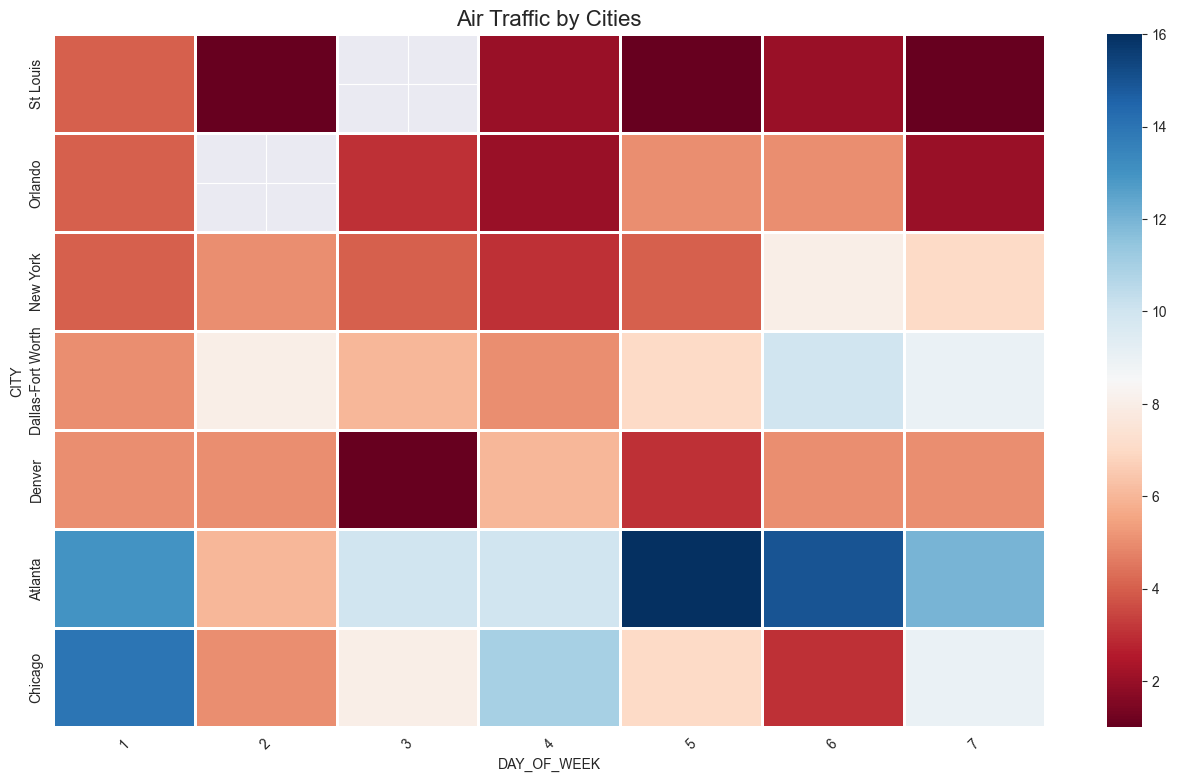

In [62]:
# Air traffic by cities
import matplotlib.pyplot as plt
import seaborn as sns

flight_volume = merged.pivot_table(index="CITY_x",columns="DAY_OF_WEEK",
                               values="DAY",aggfunc=lambda x:x.count())
fv = flight_volume.sort_values(by=1, ascending=False)[:7]
fv = fv.iloc[::-1]

fig = plt.figure(figsize=(16,9))
sns.heatmap(fv, cmap='RdBu',linecolor="w", linewidths=2)

plt.title('Air Traffic by Cities',size=16)
plt.ylabel('CITY')
plt.xticks(rotation=45)
plt.show()

In [63]:
flight_volume = merged.pivot_table(index="CITY_x",columns="DAY_OF_WEEK",
                               values="DAY",aggfunc=lambda x:x.count())
fv = flight_volume.sort_values(by=1, ascending=False)[:8]
fv.index = np.where(fv.index=='Dallas-Fort Worth','Dallas', fv.index)

trace = go.Heatmap(z=[fv.values[1],fv.values[2],fv.values[3],fv.values[4],
                      fv.values[5],fv.values[6],fv.values[7]],
                   x=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday',
                      'Saturday','Sunday'],
                   y=fv.index.values, colorscale='Reds'
                   )

data=[trace]
layout = go.Layout(
    title='Air Traffic by Cities')

fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

# Airlines comparison

In [64]:
dff = merged.groupby('AIRLINE').DEPARTURE_DELAY.mean().to_frame().sort_values(by='DEPARTURE_DELAY',
                                                                          ascending=False).round(2)
trace1 = go.Bar(
    x=dff.index,
    y=dff.DEPARTURE_DELAY,
    name='departure_delay',
    marker=dict(
        color = 'navy'
    )
)

dff = merged.groupby('AIRLINE').ARRIVAL_DELAY.mean().to_frame().sort_values(by='ARRIVAL_DELAY',
                                                                        ascending=False).round(2)
trace2 = go.Bar(
    x=dff.index,
    y=dff.ARRIVAL_DELAY,
    name='arrival_delay',
    marker=dict(
        color = 'red'
    )
)

data = [trace1, trace2]
layout = go.Layout(xaxis=dict(tickangle=15), title='Mean Arrival & Departure Delay by Airlines',
                   yaxis = dict(title = 'minute'),
                   barmode='stack')

fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

In [65]:
merged['DEP_ARR_DIFF'] = merged['DEPARTURE_DELAY'] - merged['ARRIVAL_DELAY']
dff = merged.groupby('AIRLINE').DEP_ARR_DIFF.mean().to_frame().sort_values(by='DEP_ARR_DIFF',
                                                                       ascending=False).round(2)

trace = go.Bar(
    x=dff.index,
    y=dff.DEP_ARR_DIFF,
    marker=dict(
        color = dff.DEP_ARR_DIFF,
        colorscale='Jet',
        showscale=True
    )
)

data = [trace]
layout = go.Layout(xaxis=dict(tickangle=15),
                   title='Mean (Departure Delay - Arrival Delay) by Airlines',
                   yaxis = dict(title = 'minute')
                   )

fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

In [66]:
from plotly import tools
dff = merged.groupby('CITY_x').DEPARTURE_DELAY.mean().to_frame().sort_values(by='DEPARTURE_DELAY',
                                                                         ascending=False)[:8].round(2)
trace1 = go.Bar(
    x=dff.index,
    y=dff.DEPARTURE_DELAY,
    marker=dict(
        color = 'red'
    )
)

dff = merged.groupby('CITY_y').ARRIVAL_DELAY.mean().to_frame().sort_values(by='ARRIVAL_DELAY',
                                                                       ascending=False)[:8].round(2)

trace2 = go.Bar(
    x=dff.index,
    y=dff.ARRIVAL_DELAY,
    marker=dict(
        color = 'navy'
    )
)

fig = tools.make_subplots(rows=1, cols=2, subplot_titles=('Mean Departure Delay by City',
                                                          'Mean Arrival Delay by City'))
fig.append_trace(trace1, 1,1)
fig.append_trace(trace2, 1,2)

fig['layout'].update(yaxis = dict(title = 'minute'), height=500, width=850,
                     title='Is it a systematic delay related to departure or arrival city?',
                     showlegend=False)
py.iplot(fig)

C:\Users\annag\Desktop\datavis_project\venv\lib\site-packages\plotly\tools.py:455: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



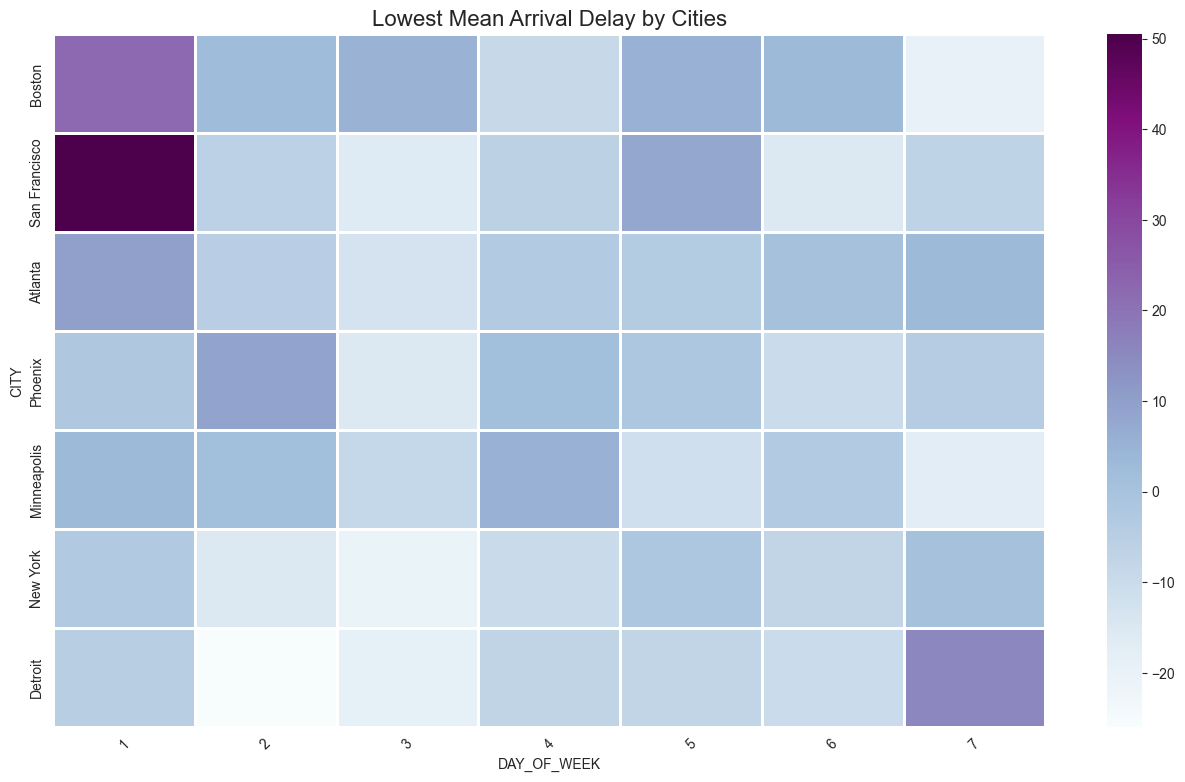

In [67]:
arr = merged.pivot_table(index="CITY_x",columns="DAY_OF_WEEK",values="ARRIVAL_DELAY",
                     aggfunc=lambda x:x.mean())
arr['sum'] = arr[1] + arr[2] +arr[3]+arr[4]+arr[5]+arr[6]+arr[7]

fv = arr.sort_values(by='sum')[:7]
fv = fv.iloc[::-1]
fv = fv.drop(['sum'], axis=1)
fig = plt.figure(figsize=(16,9))
sns.heatmap(fv, cmap='BuPu',linecolor="w", linewidths=2)

plt.title('Lowest Mean Arrival Delay by Cities', size=16)
plt.ylabel('CITY')
plt.xticks(rotation=45)
plt.show()

In [68]:
arr = merged.pivot_table(index="CITY_x",columns="DAY_OF_WEEK",values="ARRIVAL_DELAY",
                     aggfunc=lambda x:x.mean())
arr['sum'] = arr[1] + arr[2] +arr[3]+arr[4]+arr[5]+arr[6]+arr[7]
fv = arr.sort_values(by='sum')[:8]
fv = fv.iloc[::-1]
fv = fv.drop(['sum'], axis=1)

trace = go.Heatmap(z=[fv.values[1],fv.values[2],fv.values[3],fv.values[4],fv.values[5],
                      fv.values[6],fv.values[7]],
                   x=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday','Saturday','Sunday'],
                   y=fv.index.values, colorscale='Blues',
                   reversescale = True
                   )

data=[trace]
layout = go.Layout(
    title='Lowest Arrival Delay by Cities')

fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

In [69]:
# taxi in vs taxi out
dff = merged.groupby('AIRLINE').TAXI_OUT.mean().to_frame().sort_values(by='TAXI_OUT',
                                                                   ascending=False)[:8].round(2)

trace1 = go.Bar(
    x=dff.index,
    y=dff.TAXI_OUT,name='TAXI_OUT',
    marker=dict(
        color = 'aqua'
    )
)

dff = merged.groupby('AIRLINE').TAXI_IN.mean().to_frame().sort_values(by='TAXI_IN',
                                                                  ascending=False)[:8].round(2)

trace2 = go.Bar(
    x=dff.index,
    y=dff.TAXI_IN, name='TAXI_IN',
    marker=dict(
        color = 'indigo'
    )
)

fig = tools.make_subplots(rows=1, cols=2, subplot_titles=('Median Taxi Out', 'Median Taxi In'))

fig.append_trace(trace1, 1,1)
fig.append_trace(trace2, 1,2)

fig['layout'].update(yaxis = dict(title = 'minute'), height=500, width=850,
                     title='Which is hard whell-off or whell-on?',
                     showlegend=False)
py.iplot(fig)

C:\Users\annag\Desktop\datavis_project\venv\lib\site-packages\plotly\tools.py:455: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



In [70]:
merged['OUT_IN_DIFF'] = merged['TAXI_OUT'] - merged['TAXI_IN']
dff = merged.groupby('AIRLINE').OUT_IN_DIFF.mean().to_frame().sort_values(by='OUT_IN_DIFF',
                                                                      ascending=False).round(2)

trace = go.Bar(
    x=dff.index,
    y=dff.OUT_IN_DIFF,
    marker=dict(
        color = dff.OUT_IN_DIFF,
        colorscale='Jet',
        showscale=True
    )
)

data = [trace]
layout = go.Layout(xaxis=dict(tickangle=15),
                   title='Mean (Taxi Out - Taxi In) by Airlines',
                   yaxis = dict(title = 'minute'
                                )
                   )

fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

In [71]:
# Speed
merged['SPEED'] = 60*merged['DISTANCE']/merged['AIR_TIME']
dff = merged.groupby('AIRLINE').SPEED.mean().to_frame().sort_values(by='SPEED',
                                                                ascending=False).round(2)

trace = go.Scatter(
    x=dff.index,
    y=dff.SPEED,
    mode='markers',
    marker=dict(
        sizemode = 'diameter',
        sizeref = 1,
        size = 30,
        color = dff.SPEED.values,
        colorscale='Jet',
        showscale=True
    )
)

data = [trace]
layout = go.Layout(xaxis=dict(tickangle=-20),
                   title='Mean Speed by Airlines',
                   yaxis = dict(title = 'Speed')
                   )

fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

In [72]:
dff = merged.groupby('AIRLINE')[['CANCELLED']].mean().sort_values(by='CANCELLED',
                                                              ascending=False).round(3)

trace1 = go.Scatter(
    x=dff.index,
    y=dff.CANCELLED,
    mode='markers',
    marker=dict(
        symbol = 'star-square',
        sizemode = 'diameter',
        sizeref = 1,
        size = 30,
        color = dff.CANCELLED,
        colorscale='Portland',
        showscale=True
    )
)

data = [trace1]
layout = go.Layout(xaxis=dict(tickangle=20),
                   title='Cancellation Rate by Airlines', yaxis = dict(title = 'Cancellation Rate'
                                                                       )
                   )

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename="age")

dff = merged.groupby('CITY_x')[['CANCELLED']].mean().sort_values(by='CANCELLED',
                                                             ascending=False)[:10].round(3)
trace2 = go.Scatter(
    x=dff.index,
    y=dff.CANCELLED,
    mode='markers',
    marker=dict(symbol = 'diamond',
                sizemode = 'diameter',
                sizeref = 1,
                size = 30,
                color = dff.CANCELLED,
                colorscale='Portland',
                showscale=True
                )
)

data = [trace2]
layout = go.Layout(xaxis=dict(tickangle=20),
                   title='Cancellation Rate by Cities',
                   yaxis = dict(title = 'Cancellation Rate'
                                )
                   )

fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

In [73]:
reason={'A':'Airline/Carrier', 'B':'Weather', 'C':'National Air System', 'D':'Security'}
merged.CANCELLATION_REASON = merged.CANCELLATION_REASON.map(reason)

dff = merged[merged.CANCELLED==1]['MONTH'].value_counts().reset_index().sort_values(by='MONTH')
dff.columns = ['month', 'flight_num']
dff.month = dff.month.map(month)

trace = go.Bar(
    x=dff.month,
    y=dff.flight_num,
    marker=dict(
        color = dff.flight_num,
        colorscale='Reds',
        showscale=True
    )
)

data = [trace]
layout = go.Layout(
    title='# of Cancelled Flights (monthly)',
    yaxis = dict(title = '# of Flights'
                 )
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

In [121]:
merged.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE_x,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,AIRPORT_x,CITY_x,STATE_x,LATITUDE_x,LONGITUDE_x,AIRPORT_y,CITY_y,STATE_y,LATITUDE_y,LONGITUDE_y
0,2015,3,3,2,WN,Southwest Airlines Co.,934,N957WN,AUS,MCO,10:30:00,14:41:00,251.0,9.0,14:50:00,140.0,139.0,124.0,994,17:54:00,6.0,13:50:00,18:00:00,250.0,0,0,NaN,0.0,0.0,0.0,250.0,0.0,Austin-Bergstrom International Airport,Austin,TX,30.19453,-97.66987,Orlando International Airport,Orlando,FL,28.42889,-81.31603
1,2015,12,2,3,WN,Southwest Airlines Co.,347,N422WN,BNA,MCO,06:35:00,06:35:00,0.0,9.0,06:44:00,110.0,101.0,85.0,616,09:09:00,7.0,09:25:00,09:16:00,-9.0,0,0,NaN,0.0,0.0,0.0,0.0,0.0,Nashville International Airport,Nashville,TN,36.12448,-86.67818,Orlando International Airport,Orlando,FL,28.42889,-81.31603
2,2015,11,26,4,WN,Southwest Airlines Co.,6635,N8623F,STL,MCO,07:00:00,06:59:00,-1.0,8.0,07:07:00,145.0,119.0,105.0,882,09:52:00,6.0,10:25:00,09:58:00,-27.0,0,0,NaN,0.0,0.0,0.0,0.0,0.0,St. Louis International Airport at Lambert Field,St Louis,MO,38.74769,-90.35999,Orlando International Airport,Orlando,FL,28.42889,-81.31603
3,2015,7,22,3,WN,Southwest Airlines Co.,688,N797MX,HOU,MCO,15:15:00,15:47:00,32.0,6.0,15:53:00,140.0,131.0,118.0,849,18:51:00,7.0,18:35:00,18:58:00,23.0,0,0,NaN,0.0,0.0,23.0,0.0,0.0,William P. Hobby Airport,Houston,TX,29.64542,-95.27889,Orlando International Airport,Orlando,FL,28.42889,-81.31603
4,2015,11,5,4,WN,Southwest Airlines Co.,2996,N713SW,BWI,MCO,19:20:00,20:06:00,46.0,25.0,20:31:00,140.0,131.0,100.0,787,22:11:00,6.0,21:40:00,22:17:00,37.0,0,0,NaN,0.0,0.0,1.0,36.0,0.0,Baltimore-Washington International Airport,Baltimore,MD,39.17540,-76.66820,Orlando International Airport,Orlando,FL,28.42889,-81.31603


In [16]:
# Add some extra data:
merged['DELAY_OR_NOT'] = merged.loc[:, ['ARRIVAL_DELAY']] > 0

In [12]:
merged

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE_x,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,...,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,DELAY_OR_NOT
0,2015,1,1,4,AS,Alaska Airlines Inc.,98,N407AS,ANC,SEA,...,-22.0,0,0,NaN,0.0,0.0,0.0,0.0,0.0,False
1,2015,1,1,4,AS,Alaska Airlines Inc.,135,N527AS,SEA,ANC,...,-21.0,0,0,NaN,0.0,0.0,0.0,0.0,0.0,False
2,2015,1,1,4,AS,Alaska Airlines Inc.,108,N309AS,ANC,SEA,...,-14.0,0,0,NaN,0.0,0.0,0.0,0.0,0.0,False
3,2015,1,1,4,AS,Alaska Airlines Inc.,122,N413AS,ANC,PDX,...,-18.0,0,0,NaN,0.0,0.0,0.0,0.0,0.0,False
4,2015,1,1,4,AS,Alaska Airlines Inc.,130,N457AS,FAI,SEA,...,-3.0,0,0,NaN,0.0,0.0,0.0,0.0,0.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5819074,2015,12,31,4,VX,Virgin America,769,N622VA,LGA,DAL,...,-6.0,0,0,NaN,0.0,0.0,0.0,0.0,0.0,False
5819075,2015,12,31,4,VX,Virgin America,357,N284VA,BOS,SFO,...,-46.0,0,0,NaN,0.0,0.0,0.0,0.0,0.0,False
5819076,2015,12,31,4,VX,Virgin America,1916,N853VA,SFO,LAS,...,-18.0,0,0,NaN,0.0,0.0,0.0,0.0,0.0,False
5819077,2015,12,31,4,VX,Virgin America,490,N840VA,LAX,LAS,...,-11.0,0,0,NaN,0.0,0.0,0.0,0.0,0.0,False


In [17]:
flights_per_airport = merged.groupby('AIRPORT_x').size().reset_index(name='Total Flights')

delayed_flights_per_airport = merged[merged['DELAY_OR_NOT'] == True].groupby('AIRPORT_x').size().reset_index(name='Delayed Flights')

merged_df = pd.merge(flights_per_airport, delayed_flights_per_airport, on='AIRPORT_x', how='left')

merged_df['Delayed Flights'].fillna(0, inplace=True)


merged_df['Percentage Delayed'] = (merged_df['Delayed Flights'] / merged_df['Total Flights']) * 100

merged = pd.merge(merged, merged_df[['AIRPORT_x', 'Percentage Delayed']], left_on='AIRPORT_x', right_on = 'AIRPORT_x')
print(merged)

         YEAR  MONTH  DAY  DAY_OF_WEEK AIRLINE_x               AIRLINE  \
0        2015      1    1            4        AS  Alaska Airlines Inc.   
1        2015      1    1            4        AS  Alaska Airlines Inc.   
2        2015      1    1            4        AS  Alaska Airlines Inc.   
3        2015      1    1            4        AS  Alaska Airlines Inc.   
4        2015      1    1            4        AS  Alaska Airlines Inc.   
...       ...    ...  ...          ...       ...                   ...   
5332909  2015      9    4            5        B6       JetBlue Airways   
5332910  2015      9    5            6        B6       JetBlue Airways   
5332911  2015      9    6            7        B6       JetBlue Airways   
5332912  2015      9    7            1        B6       JetBlue Airways   
5332913  2015      9    8            2        B6       JetBlue Airways   

         FLIGHT_NUMBER TAIL_NUMBER ORIGIN_AIRPORT DESTINATION_AIRPORT  ...  \
0                   98      N407A

In [18]:
delayed_departure = merged[merged['ARRIVAL_DELAY'] > 0].groupby('AIRPORT_x')['DEPARTURE_DELAY'].mean().reset_index(name='Departure Delay Mean')

arrival_departure = merged[merged['ARRIVAL_DELAY'] > 0].groupby('AIRPORT_x')['ARRIVAL_DELAY'].mean().reset_index(name='Arrival Delay Mean')
merged = pd.merge(merged, delayed_departure, on='AIRPORT_x', how='left')
merged = pd.merge(merged, arrival_departure, on='AIRPORT_x', how='left')

print(merged)

         YEAR  MONTH  DAY  DAY_OF_WEEK AIRLINE_x               AIRLINE  \
0        2015      1    1            4        AS  Alaska Airlines Inc.   
1        2015      1    1            4        AS  Alaska Airlines Inc.   
2        2015      1    1            4        AS  Alaska Airlines Inc.   
3        2015      1    1            4        AS  Alaska Airlines Inc.   
4        2015      1    1            4        AS  Alaska Airlines Inc.   
...       ...    ...  ...          ...       ...                   ...   
5332909  2015      9    4            5        B6       JetBlue Airways   
5332910  2015      9    5            6        B6       JetBlue Airways   
5332911  2015      9    6            7        B6       JetBlue Airways   
5332912  2015      9    7            1        B6       JetBlue Airways   
5332913  2015      9    8            2        B6       JetBlue Airways   

         FLIGHT_NUMBER TAIL_NUMBER ORIGIN_AIRPORT DESTINATION_AIRPORT  ...  \
0                   98      N407A

In [19]:
merged['Departure Delay Mean'].fillna(0, inplace=True)
merged['Arrival Delay Mean'].fillna(0, inplace=True)

In [20]:
merged['DATE'] = pd.to_datetime(merged[['YEAR', 'MONTH', 'DAY']])
print(merged)

         YEAR  MONTH  DAY  DAY_OF_WEEK AIRLINE_x               AIRLINE  \
0        2015      1    1            4        AS  Alaska Airlines Inc.   
1        2015      1    1            4        AS  Alaska Airlines Inc.   
2        2015      1    1            4        AS  Alaska Airlines Inc.   
3        2015      1    1            4        AS  Alaska Airlines Inc.   
4        2015      1    1            4        AS  Alaska Airlines Inc.   
...       ...    ...  ...          ...       ...                   ...   
5332909  2015      9    4            5        B6       JetBlue Airways   
5332910  2015      9    5            6        B6       JetBlue Airways   
5332911  2015      9    6            7        B6       JetBlue Airways   
5332912  2015      9    7            1        B6       JetBlue Airways   
5332913  2015      9    8            2        B6       JetBlue Airways   

         FLIGHT_NUMBER TAIL_NUMBER ORIGIN_AIRPORT DESTINATION_AIRPORT  ...  \
0                   98      N407A

In [21]:
merged.to_csv('2015_dataset/merged_final.csv')

In [92]:
merged_final = pd.read_csv('2015_dataset/merged_final.csv')

In [23]:
merged_milion_sample = merged.sample(1000000)

In [25]:
merged_100k_sample = merged.sample(100000)

In [27]:
merged_50k_sample = merged.sample(50000)

In [29]:
merged_25_sample = merged.sample(25000)

In [32]:
merged_10k_sample = merged.sample(10000)

In [34]:
merged_3k_sample = merged.sample(3000)

In [36]:
merged_1k_sample = merged.sample(1000)

In [24]:
merged_milion_sample.to_csv('2015_dataset/merged_milion_sample.csv')

In [26]:
merged_100k_sample.to_csv('2015_dataset/merged_100k_sample.csv')

In [28]:
merged_50k_sample.to_csv('2015_dataset/merged_50k_sample.csv')

In [30]:
merged_25_sample.to_csv('2015_dataset/merged_25k_sample.csv')

In [33]:
merged_10k_sample.to_csv('2015_dataset/merged_10k_sample.csv')

In [35]:
merged_3k_sample.to_csv('2015_dataset/merged_3k_sample.csv')

In [37]:
merged_1k_sample.to_csv('2015_dataset/merged_1k_sample.csv')

## Data visualization for whole dataset

In [ ]:
import plotly.graph_objs as go
import plotly.offline as py
# Origin airport distribution
dff = merged_full_dataset['AIRPORT_x'].value_counts()[:10]
label = dff.index
size = dff.values

colors = ['skyblue', '#FEBFB3', '#96D38C', '#D0F9B1', 'gold', 'orange', 'lightgrey',
          'lightblue','lightgreen','aqua']
trace = go.Pie(labels=label, values=size, marker=dict(colors=colors),hole = .2)

data = [trace]
layout = go.Layout(
    title='Origin Airport Distribution'
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

In [ ]:
# Origin city distribution
dff = merged_full_dataset.CITY_x.value_counts()[:10]

trace = go.Bar(
    x=dff.index,
    y=dff.values,
    marker=dict(
        color = dff.values,
        colorscale='Jet',
        showscale=True
    )
)

data = [trace]
layout = go.Layout(
    title='Origin City Distribution',
    yaxis = dict(title = '# of Flights')
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

In [ ]:
# Airline distribution
dff = merged_full_dataset.AIRLINE.value_counts()[:10]

trace = go.Bar(
    x=dff.index,
    y=dff.values,
    marker=dict(
        color = dff.values,
        colorscale='Jet',
        showscale=True)
)

data = [trace]
layout = go.Layout(xaxis=dict(tickangle=15),
                   title='Airline distribution',
                   yaxis = dict(title = '# of Flights'))

fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

In [ ]:
# Number of flights by month
dff = merged_full_dataset.MONTH.value_counts().to_frame().reset_index().sort_values(by='MONTH')
dff.columns = ['month', 'flight_num']
month = {1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May',
         6: 'Jun', 7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'}
dff.month = dff.month.map(month)

trace = go.Bar(
    x=dff.month,
    y=dff.flight_num,
    marker=dict(
        color = dff.flight_num,
        colorscale='Reds',
        showscale=True)
)

data = [trace]
layout = go.Layout(
    title='# of Flights (monthly)',
    yaxis = dict(title = '# of Flights'
                 )
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

In [ ]:
# Number of flights by day of the week
dff = merged_full_dataset.DAY_OF_WEEK.value_counts().to_frame().reset_index().sort_values(by='DAY_OF_WEEK')
dff.columns = ['day', 'flight_num']
dayOfWeek={1:'Monday', 2:'Tuesday', 3:'Wednesday', 4:'Thursday', 5:'Friday',
           6:'Saturday', 7:'Sunday'}
dff.day = dff.day.map(dayOfWeek)

trace1 = go.Bar(
    x=dff.day,
    y=dff.flight_num,
    name = 'Weather',
    marker=dict(
        color = dff.flight_num,
        colorscale='Jet',
        showscale=True
    )
)

data = [trace1]
layout = go.Layout(
    title='# of Flights (Day of Week)',
    yaxis = dict(title = '# of Flights'
                 )
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

In [ ]:
# Air traffic by cities
import matplotlib.pyplot as plt
import seaborn as sns

flight_volume = merged_full_dataset.pivot_table(index="CITY_x",columns="DAY_OF_WEEK",
                               values="DAY",aggfunc=lambda x:x.count())
fv = flight_volume.sort_values(by=1, ascending=False)[:7]
fv = fv.iloc[::-1]

fig = plt.figure(figsize=(16,9))
sns.heatmap(fv, cmap='RdBu',linecolor="w", linewidths=2)

plt.title('Air Traffic by Cities',size=16)
plt.ylabel('CITY')
plt.xticks(rotation=45)
plt.show()

In [ ]:
flight_volume = merged_full_dataset.pivot_table(index="CITY_x",columns="DAY_OF_WEEK",
                               values="DAY",aggfunc=lambda x:x.count())
fv = flight_volume.sort_values(by=1, ascending=False)[:8]
fv.index = np.where(fv.index=='Dallas-Fort Worth','Dallas', fv.index)

trace = go.Heatmap(z=[fv.values[1],fv.values[2],fv.values[3],fv.values[4],
                      fv.values[5],fv.values[6],fv.values[7]],
                   x=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday',
                      'Saturday','Sunday'],
                   y=fv.index.values, colorscale='Reds'
                   )

data=[trace]
layout = go.Layout(
    title='Air Traffic by Cities')

fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

### Airlines comparison

In [ ]:
dff = merged_full_dataset.groupby('AIRLINE').DEPARTURE_DELAY.mean().to_frame().sort_values(by='DEPARTURE_DELAY',
                                                                          ascending=False).round(2)
trace1 = go.Bar(
    x=dff.index,
    y=dff.DEPARTURE_DELAY,
    name='departure_delay',
    marker=dict(
        color = 'navy'
    )
)

dff = merged_full_dataset.groupby('AIRLINE').ARRIVAL_DELAY.mean().to_frame().sort_values(by='ARRIVAL_DELAY',
                                                                        ascending=False).round(2)
trace2 = go.Bar(
    x=dff.index,
    y=dff.ARRIVAL_DELAY,
    name='arrival_delay',
    marker=dict(
        color = 'red'
    )
)

data = [trace1, trace2]
layout = go.Layout(xaxis=dict(tickangle=15), title='Mean Arrival & Departure Delay by Airlines',
                   yaxis = dict(title = 'minute'),
                   barmode='stack')

fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

In [ ]:
merged_full_dataset['DEP_ARR_DIFF'] = merged_full_dataset['DEPARTURE_DELAY'] - merged_full_dataset['ARRIVAL_DELAY']
dff = merged_full_dataset.groupby('AIRLINE').DEP_ARR_DIFF.mean().to_frame().sort_values(by='DEP_ARR_DIFF',
                                                                       ascending=False).round(2)

trace = go.Bar(
    x=dff.index,
    y=dff.DEP_ARR_DIFF,
    marker=dict(
        color = dff.DEP_ARR_DIFF,
        colorscale='Jet',
        showscale=True
    )
)

data = [trace]
layout = go.Layout(xaxis=dict(tickangle=15),
                   title='Mean (Departure Delay - Arrival Delay) by Airlines',
                   yaxis = dict(title = 'minute')
                   )

fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

In [ ]:
from plotly import tools
dff = merged_full_dataset.groupby('CITY_x').DEPARTURE_DELAY.mean().to_frame().sort_values(by='DEPARTURE_DELAY',
                                                                         ascending=False)[:8].round(2)
trace1 = go.Bar(
    x=dff.index,
    y=dff.DEPARTURE_DELAY,
    marker=dict(
        color = 'red'
    )
)

dff = merged_full_dataset.groupby('CITY_y').ARRIVAL_DELAY.mean().to_frame().sort_values(by='ARRIVAL_DELAY',
                                                                       ascending=False)[:8].round(2)

trace2 = go.Bar(
    x=dff.index,
    y=dff.ARRIVAL_DELAY,
    marker=dict(
        color = 'navy'
    )
)

fig = tools.make_subplots(rows=1, cols=2, subplot_titles=('Mean Departure Delay by City',
                                                          'Mean Arrival Delay by City'))
fig.append_trace(trace1, 1,1)
fig.append_trace(trace2, 1,2)

fig['layout'].update(yaxis = dict(title = 'minute'), height=500, width=850,
                     title='Is it a systematic delay related to departure or arrival city?',
                     showlegend=False)
py.iplot(fig)

In [ ]:
arr = merged_full_dataset.pivot_table(index="CITY_x",columns="DAY_OF_WEEK",values="ARRIVAL_DELAY",
                     aggfunc=lambda x:x.mean())
arr['sum'] = arr[1] + arr[2] +arr[3]+arr[4]+arr[5]+arr[6]+arr[7]

fv = arr.sort_values(by='sum')[:7]
fv = fv.iloc[::-1]
fv = fv.drop(['sum'], axis=1)
fig = plt.figure(figsize=(16,9))
sns.heatmap(fv, cmap='BuPu',linecolor="w", linewidths=2)

plt.title('Lowest Mean Arrival Delay by Cities', size=16)
plt.ylabel('CITY')
plt.xticks(rotation=45)
plt.show()

In [ ]:
arr = merged_full_dataset.pivot_table(index="CITY_x",columns="DAY_OF_WEEK",values="ARRIVAL_DELAY",
                     aggfunc=lambda x:x.mean())
arr['sum'] = arr[1] + arr[2] +arr[3]+arr[4]+arr[5]+arr[6]+arr[7]
fv = arr.sort_values(by='sum')[:8]
fv = fv.iloc[::-1]
fv = fv.drop(['sum'], axis=1)

trace = go.Heatmap(z=[fv.values[1],fv.values[2],fv.values[3],fv.values[4],fv.values[5],
                      fv.values[6],fv.values[7]],
                   x=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday','Saturday','Sunday'],
                   y=fv.index.values, colorscale='Blues',
                   reversescale = True
                   )

data=[trace]
layout = go.Layout(
    title='Lowest Arrival Delay by Cities')

fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

In [ ]:
# taxi in vs taxi out
dff = merged_full_dataset.groupby('AIRLINE').TAXI_OUT.mean().to_frame().sort_values(by='TAXI_OUT',
                                                                   ascending=False)[:8].round(2)

trace1 = go.Bar(
    x=dff.index,
    y=dff.TAXI_OUT,name='TAXI_OUT',
    marker=dict(
        color = 'aqua'
    )
)

dff = merged_full_dataset.groupby('AIRLINE').TAXI_IN.mean().to_frame().sort_values(by='TAXI_IN',
                                                                  ascending=False)[:8].round(2)

trace2 = go.Bar(
    x=dff.index,
    y=dff.TAXI_IN, name='TAXI_IN',
    marker=dict(
        color = 'indigo'
    )
)

fig = tools.make_subplots(rows=1, cols=2, subplot_titles=('Median Taxi Out', 'Median Taxi In'))

fig.append_trace(trace1, 1,1)
fig.append_trace(trace2, 1,2)

fig['layout'].update(yaxis = dict(title = 'minute'), height=500, width=850,
                     title='Which is hard whell-off or whell-on?',
                     showlegend=False)
py.iplot(fig)

In [ ]:
merged_full_dataset['OUT_IN_DIFF'] = merged_full_dataset['TAXI_OUT'] - merged_full_dataset['TAXI_IN']
dff = merged_full_dataset.groupby('AIRLINE').OUT_IN_DIFF.mean().to_frame().sort_values(by='OUT_IN_DIFF',
                                                                      ascending=False).round(2)

trace = go.Bar(
    x=dff.index,
    y=dff.OUT_IN_DIFF,
    marker=dict(
        color = dff.OUT_IN_DIFF,
        colorscale='Jet',
        showscale=True
    )
)

data = [trace]
layout = go.Layout(xaxis=dict(tickangle=15),
                   title='Mean (Taxi Out - Taxi In) by Airlines',
                   yaxis = dict(title = 'minute'
                                )
                   )

fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

In [ ]:
# Speed
merged_full_dataset['SPEED'] = 60*merged_full_dataset['DISTANCE']/merged_full_dataset['AIR_TIME']
dff = merged_full_dataset.groupby('AIRLINE').SPEED.mean().to_frame().sort_values(by='SPEED',
                                                                ascending=False).round(2)

trace = go.Scatter(
    x=dff.index,
    y=dff.SPEED,
    mode='markers',
    marker=dict(
        sizemode = 'diameter',
        sizeref = 1,
        size = 30,
        color = dff.SPEED.values,
        colorscale='Jet',
        showscale=True
    )
)

data = [trace]
layout = go.Layout(xaxis=dict(tickangle=-20),
                   title='Mean Speed by Airlines',
                   yaxis = dict(title = 'Speed')
                   )

fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

In [ ]:
dff = merged_full_dataset.groupby('AIRLINE')[['CANCELLED']].mean().sort_values(by='CANCELLED',
                                                              ascending=False).round(3)

trace1 = go.Scatter(
    x=dff.index,
    y=dff.CANCELLED,
    mode='markers',
    marker=dict(
        symbol = 'star-square',
        sizemode = 'diameter',
        sizeref = 1,
        size = 30,
        color = dff.CANCELLED,
        colorscale='Portland',
        showscale=True
    )
)

data = [trace1]
layout = go.Layout(xaxis=dict(tickangle=20),
                   title='Cancellation Rate by Airlines', yaxis = dict(title = 'Cancellation Rate'
                                                                       )
                   )

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename="age")

dff = merged_full_dataset.groupby('CITY_x')[['CANCELLED']].mean().sort_values(by='CANCELLED',
                                                             ascending=False)[:10].round(3)
trace2 = go.Scatter(
    x=dff.index,
    y=dff.CANCELLED,
    mode='markers',
    marker=dict(symbol = 'diamond',
                sizemode = 'diameter',
                sizeref = 1,
                size = 30,
                color = dff.CANCELLED,
                colorscale='Portland',
                showscale=True
                )
)

data = [trace2]
layout = go.Layout(xaxis=dict(tickangle=20),
                   title='Cancellation Rate by Cities',
                   yaxis = dict(title = 'Cancellation Rate'
                                )
                   )

fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

In [ ]:
reason={'A':'Airline/Carrier', 'B':'Weather', 'C':'National Air System', 'D':'Security'}
merged_full_dataset.CANCELLATION_REASON = merged_full_dataset.CANCELLATION_REASON.map(reason)

dff = merged_full_dataset[merged_full_dataset.CANCELLED==1]['MONTH'].value_counts().reset_index().sort_values(by='MONTH')
dff.columns = ['month', 'flight_num']
dff.month = dff.month.map(month)

trace = go.Bar(
    x=dff.month,
    y=dff.flight_num,
    marker=dict(
        color = dff.flight_num,
        colorscale='Reds',
        showscale=True
    )
)

data = [trace]
layout = go.Layout(
    title='# of Cancelled Flights (monthly)',
    yaxis = dict(title = '# of Flights'
                 )
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

In [ ]:
merged_full_dataset.head()

In [ ]:
merged_full_dataset.to_csv('2015_dataset/merged_final_full_dataset.csv')